In [5]:
import pytrends as pt
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import datetime as dt

In [4]:
help('pytrends.request')

Help on module pytrends.request in pytrends:

NAME
    pytrends.request

CLASSES
    builtins.object
        TrendReq
    
    class TrendReq(builtins.object)
     |  TrendReq(hl='en-US', tz=360, geo='', proxies='')
     |  
     |  Google Trends API
     |  
     |  Methods defined here:
     |  
     |  __init__(self, hl='en-US', tz=360, geo='', proxies='')
     |      Initialize default values for params
     |  
     |  build_payload(self, kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
     |      Create the payload for related queries, interest over time and interest by region
     |  
     |  categories(self)
     |      Request available categories data from Google's API and return a dictionary
     |  
     |  get_historical_interest(self, keywords, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)
     |      Gets historical hourly data for interest by chunking requests to 1

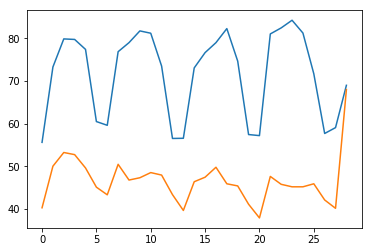

In [11]:
trend_request = pt.request.TrendReq()
key_words = ['Data', 'Science']
trend_request.build_payload(kw_list=key_words)
trends = trend_request.get_historical_interest(keywords=key_words ).reset_index()
trends = trends.groupby([dt.datetime.strftime(date, '%Y%m%d') for date in trends.date]).mean().reset_index()
plt.plot(trends.index, trends[key_words])
#categories = trend_request.categories()
#categories
#get_historical_interest